In [ ]:
import sys
import os
if sys.platform == 'win32':
    os.environ["PATH"] += os.pathsep + r"C:\Users\Admin\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg.Shared_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-6.1.1-full_build-shared\bin"
    from torchaudio._extension.utils import _init_dll_path
    _init_dll_path()  # Đảm bảo load DLL từ PATH
import torchcodec
print(torchcodec.__version__)

import os
import time
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset, DownloadMode
from IPython.display import display, clear_output

# ===================================================================
# Phần code gốc của bạn (giữ nguyên)
# ===================================================================

# 1. Tên thư mục bạn muốn lưu dataset vào
save_directory = "american_sign_language_dataset"
os.makedirs(save_directory, exist_ok=True)
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
#ds = load_dataset("asthalochan/American_Sign_Language", download_mode=DownloadMode.FORCE_REDOWNLOAD)
ds = load_dataset("asthalochan/American_Sign_Language")

# in ra số lượng video trong tập huấn luyện
print(f"Số lượng video trong tập huấn luyện: {len(ds['train'])}")
# in ra thông tin của một video mẫu
print(ds['train'][0])

# convert video sang Video 
video_item = ds['train'][0]
video_object = video_item['video']

# --- BẮT ĐẦU PHẦN CODE MỚI ĐỂ HIỂN THỊ ---

# 3. Lấy dữ liệu video dưới dạng Tensor
# Dữ liệu video là một tensor có kích thước (Số khung hình, Cao, Rộng, Số kênh màu)
# Tiếng Anh: (Time, Height, Width, Channels) -> (T, H, W, C)
# SỬA LỖI Ở ĐÂY: Dùng [:] để lấy tất cả các khung hình từ VideoDecoder
video_object = video_item['video']

# 3. Lấy dữ liệu video dưới dạng Tensor
video_tensor = video_object[:]
print(f"Video có dạng tensor với kích thước: {video_tensor.shape}")

# 4. Chuyển Tensor sang NumPy array
video_np = video_tensor.numpy()

# 5. Chọn và hiển thị một vài khung hình
num_frames_to_show = 5
total_frames = len(video_np)
frame_indices = np.linspace(0, total_frames - 1, num_frames_to_show, dtype=int)
print(f"Đang hiển thị các khung hình số: {frame_indices}")

fig, axes = plt.subplots(1, num_frames_to_show, figsize=(20, 5))
if num_frames_to_show == 1:
    axes = [axes]

for i, frame_index in enumerate(frame_indices):
    # Lấy ra khung hình tại chỉ số frame_index (vẫn ở định dạng C, H, W)
    frame = video_np[frame_index]
    
    # --- SỬA LỖI Ở ĐÂY ---
    # Chuyển đổi thứ tự các trục từ (C, H, W) sang (H, W, C) để matplotlib hiển thị
    frame_for_display = frame.transpose(1, 2, 0)
    
    # Hiển thị khung hình đã được chuyển đổi
    axes[i].imshow(frame_for_display)
    axes[i].set_title(f"Khung hình {frame_index}")
    axes[i].axis('off')

plt.show()

Video đã phát xong.


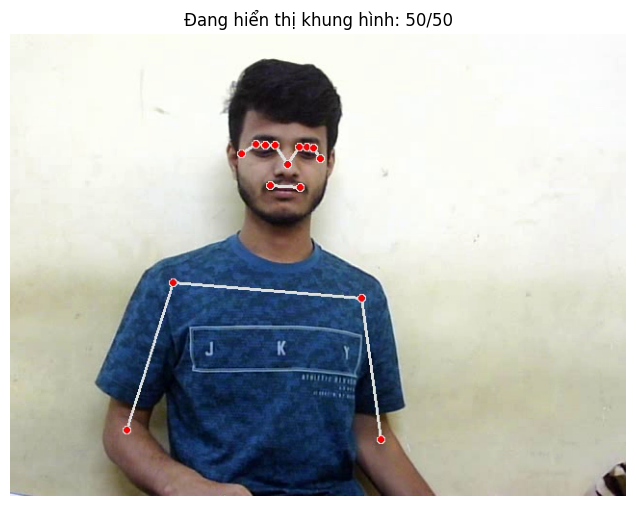

In [7]:
import sys
import os
# Đoạn code kiểm tra hệ điều hành và thêm PATH của bạn
if sys.platform == 'win32':
    # Vui lòng đảm bảo đường dẫn này là chính xác trên máy của bạn
    ffmpeg_path = r"C:\Users\Admin\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg.Shared_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-6.1.1-full_build-shared\bin"
    if ffmpeg_path not in os.environ["PATH"]:
        os.environ["PATH"] += os.pathsep + ffmpeg_path
    from torchaudio._extension.utils import _init_dll_path
    _init_dll_path()

import torchcodec
print(f"Torchcodec version: {torchcodec.__version__}")

import time
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from IPython.display import display, clear_output

# ===================================================================
# Phần code gốc của bạn (giữ nguyên)
# ===================================================================

# Login using e.g. `huggingface-cli login` to access this dataset if needed
ds = load_dataset("asthalochan/American_Sign_Language")

# in ra số lượng video trong tập huấn luyện
print(f"Số lượng video trong tập huấn luyện: {len(ds['train'])}")
# in ra thông tin của một video mẫu
print(ds['train'][0])

# Lấy một video mẫu
video_item = ds['train'][0]
video_object = video_item['video']

# Lấy dữ liệu video dưới dạng Tensor
video_tensor = video_object[:]
print(f"Video có dạng tensor với kích thước: {video_tensor.shape}")

# Chuyển Tensor sang NumPy array
video_np = video_tensor.numpy()

# ===================================================================
# --- BẮT ĐẦU PHẦN CODE MỚI ĐỂ HIỂN THỊ TOÀN BỘ VIDEO ---
# ===================================================================

# 1. Thiết lập khung vẽ (figure) bên ngoài vòng lặp
fig, ax = plt.subplots(figsize=(8, 6))

# 2. Đặt tốc độ phát video (khung hình trên giây)
# Ví dụ: 25 FPS -> thời gian chờ giữa các khung hình là 1/25 = 0.04 giây
playback_speed_fps = 25
sleep_time = 1 / playback_speed_fps

print("\nChuẩn bị phát video...")
time.sleep(2) # Chờ 2 giây trước khi bắt đầu

# 3. Lặp qua tất cả các khung hình để hiển thị
total_frames = len(video_np)
for frame_index, frame in enumerate(video_np):
    try:
        # Xóa output của cell hiện tại để vẽ khung hình mới
        clear_output(wait=True)

        # Chuyển đổi thứ tự các trục từ (C, H, W) sang (H, W, C) để matplotlib hiển thị
        frame_for_display = frame.transpose(1, 2, 0)

        # Hiển thị khung hình
        ax.imshow(frame_for_display)
        ax.set_title(f"Đang hiển thị khung hình: {frame_index + 1}/{total_frames}")
        ax.axis('off')

        # Hiển thị hình ảnh đã được cập nhật
        display(fig)

        # Tạm dừng để kiểm soát tốc độ phát
        time.sleep(sleep_time)

    except KeyboardInterrupt:
        # Cho phép bạn dừng vòng lặp bằng cách nhấn nút "Interrupt" trong Notebook
        print("\nĐã dừng phát video.")
        break

# Dọn dẹp output sau khi video kết thúc hoặc bị dừng
clear_output(wait=True)
print("Video đã phát xong.")


Nhãn (label) của video: 0
Kiểu của nhãn (label): <class 'int'>
Số lượng nhãn trong bộ dữ liệu: 47
Thống kê số lượng video cho mỗi nhãn:
  Nhãn 'again' (ID: 0): 88 video
  Nhãn 'bad' (ID: 1): 70 video
  Nhãn 'bathroom' (ID: 2): 91 video
  Nhãn 'book' (ID: 3): 77 video
  Nhãn 'busy' (ID: 4): 63 video
  Nhãn 'do not want' (ID: 5): 68 video
  Nhãn 'eat' (ID: 6): 68 video
  Nhãn 'father' (ID: 7): 68 video
  Nhãn 'fine' (ID: 8): 76 video
  Nhãn 'finish' (ID: 9): 76 video
  Nhãn 'forget' (ID: 10): 74 video
  Nhãn 'go' (ID: 11): 73 video
  Nhãn 'good' (ID: 12): 70 video
  Nhãn 'happy' (ID: 13): 76 video
  Nhãn 'hello' (ID: 14): 70 video
  Nhãn 'help' (ID: 15): 76 video
  Nhãn 'how' (ID: 16): 72 video
  Nhãn 'i' (ID: 17): 68 video
  Nhãn 'learn' (ID: 18): 82 video
  Nhãn 'like' (ID: 19): 96 video
  Nhãn 'meet' (ID: 20): 99 video
  Nhãn 'milk' (ID: 21): 81 video
  Nhãn 'more' (ID: 22): 76 video
  Nhãn 'mother' (ID: 23): 83 video
  Nhãn 'my' (ID: 24): 80 video
  Nhãn 'name' (ID: 25): 114 video
  

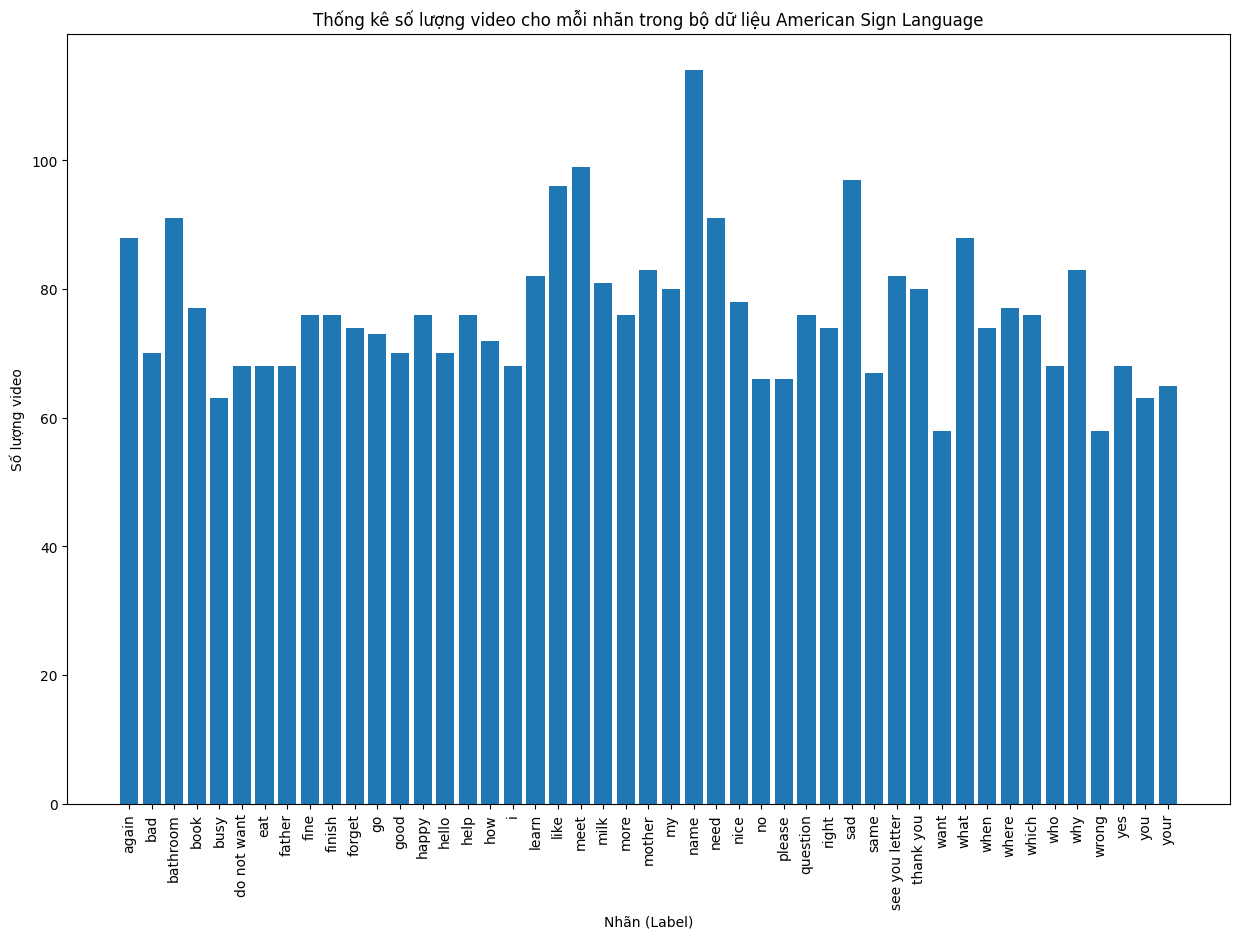

In [6]:
# In label của video
print(f"Nhãn (label) của video: {video_item['label']}")
# in ra kiểu của label
print(f"Kiểu của nhãn (label): {type(video_item['label'])}")
# in ra số lượng nhãn trong bộ dữ liệu
print(f"Số lượng nhãn trong bộ dữ liệu: {len(ds['train'].features['label'].names)}")
# thống kê số lượng video cho mỗi nhãn
from collections import Counter
label_counts = Counter()
for item in ds['train']:
    label_counts[item['label']] += 1
print("Thống kê số lượng video cho mỗi nhãn:")
for label_id, count in label_counts.items():
    label_name = ds['train'].features['label'].names[label_id]
    print(f"  Nhãn '{label_name}' (ID: {label_id}): {count} video")
# hiển thị bằng matplotlib tất cả các nhãn trong bộ dữ liệu
num_labels = len(ds['train'].features['label'].names)
plt.figure(figsize=(15, 10))
plt.bar(range(num_labels), [label_counts[i] for i in range(num_labels)])
plt.xticks(range(num_labels), ds['train'].features['label'].names, rotation=90)
plt.xlabel("Nhãn (Label)")
plt.ylabel("Số lượng video")
plt.title("Thống kê số lượng video cho mỗi nhãn trong bộ dữ liệu American Sign Language")
plt.show()


In [8]:
import os
import time
from datasets import load_dataset, DownloadMode

# ===================================================================
# Cấu hình
# ===================================================================

# Tên dataset trên Hugging Face Hub
DATASET_NAME = "asthalochan/American_Sign_Language"

# Tên thư mục cục bộ bạn muốn lưu dataset vào
# Thư mục này sẽ được tạo ra nếu chưa có.
LOCAL_SAVE_PATH = "asl_dataset_local"


# ===================================================================
# Script chính
# ===================================================================

def main():
    """
    Hàm chính để tải, xử lý và lưu dataset.
    """
    print("========================================================")
    print(" BẮT ĐẦU SCRIPT TẢI VÀ LƯU DATASET")
    print("========================================================")

    # --- Bước 1: Kiểm tra xem dữ liệu đã tồn tại chưa ---
    if os.path.exists(LOCAL_SAVE_PATH):
        print(f"-> Thư mục '{LOCAL_SAVE_PATH}' đã tồn tại.")
        print("-> Quá trình có thể đã được hoàn thành trước đó. Bỏ qua.")
        print("-> Nếu bạn muốn tải lại từ đầu, hãy XÓA thư mục này và chạy lại script.")
        return # Kết thúc script

    print(f"-> Thư mục '{LOCAL_SAVE_PATH}' chưa tồn tại. Bắt đầu quá trình mới.")
    os.makedirs(LOCAL_SAVE_PATH, exist_ok=True)

    # --- Bước 2: Tải dataset từ Hugging Face Hub ---
    print(f"\n[Bước 1/2] Đang tải dataset '{DATASET_NAME}'...")
    print("Lưu ý: Quá trình này có thể mất một vài phút tùy thuộc vào tốc độ mạng.")
    
    start_time = time.time()
    try:
        # Load dataset, buộc tải lại nếu cache có vấn đề
        ds = load_dataset(DATASET_NAME)
        
        duration = time.time() - start_time
        print(f"-> Tải xong! Thời gian: {duration:.2f} giây.")
        print("\nThông tin dataset đã tải:")
        print(ds)

    except Exception as e:
        print(f"\nLỖI: Không thể tải dataset. Vui lòng kiểm tra kết nối Internet.")
        print(f"Chi tiết lỗi: {e}")
        return # Dừng script nếu có lỗi

    # --- Bước 3: Lưu dataset vào đĩa ở định dạng Arrow ---
    print(f"\n[Bước 2/2] Đang lưu dataset vào thư mục cục bộ '{LOCAL_SAVE_PATH}'...")
    print("Quá trình này đang chuyển đổi dữ liệu thành định dạng Arrow hiệu quả cho việc huấn luyện.")

    start_time_save = time.time()
    try:
        ds.save_to_disk(LOCAL_SAVE_PATH)
        duration_save = time.time() - start_time_save
        print(f"-> Lưu thành công! Thời gian: {duration_save:.2f} giây.")

    except Exception as e:
        print(f"\nLỖI: Không thể lưu dataset vào đĩa.")
        print(f"Chi tiết lỗi: {e}")
        return

    # --- Hoàn tất ---
    print("\n========================================================")
    print(" ✅ HOÀN TẤT THÀNH CÔNG!")
    print(f" Bộ dữ liệu đã được lưu tại: '{os.path.abspath(LOCAL_SAVE_PATH)}'")
    print("========================================================")
    print("\nBƯỚC TIẾP THEO:")
    print(f" 1. Nén (ZIP) thư mục '{LOCAL_SAVE_PATH}' lại.")
    print(f" 2. Tải file ZIP đó lên Kaggle Datasets hoặc Google Drive.")
    print(f" 3. Trong notebook huấn luyện, giải nén và dùng `load_from_disk('{LOCAL_SAVE_PATH}')`.")

if __name__ == "__main__":
    # Cài đặt thư viện nếu cần
    try:
        import datasets
    except ImportError:
        print("Thư viện 'datasets' chưa được cài đặt. Đang tiến hành cài đặt...")
        os.system('pip install datasets')

    main()

 BẮT ĐẦU SCRIPT TẢI VÀ LƯU DATASET
-> Thư mục 'asl_dataset_local' chưa tồn tại. Bắt đầu quá trình mới.

[Bước 1/2] Đang tải dataset 'asthalochan/American_Sign_Language'...
Lưu ý: Quá trình này có thể mất một vài phút tùy thuộc vào tốc độ mạng.
-> Tải xong! Thời gian: 5.34 giây.

Thông tin dataset đã tải:
DatasetDict({
    train: Dataset({
        features: ['video', 'label'],
        num_rows: 3590
    })
})

[Bước 2/2] Đang lưu dataset vào thư mục cục bộ 'asl_dataset_local'...
Quá trình này đang chuyển đổi dữ liệu thành định dạng Arrow hiệu quả cho việc huấn luyện.


Saving the dataset (7/7 shards): 100%|██████████| 3590/3590 [00:00<00:00, 48507.50 examples/s]

-> Lưu thành công! Thời gian: 28.57 giây.

 ✅ HOÀN TẤT THÀNH CÔNG!
 Bộ dữ liệu đã được lưu tại: 'c:\Users\Admin\Documents\HUST\2025.1\Project3\asl_dataset_local'

BƯỚC TIẾP THEO:
 1. Nén (ZIP) thư mục 'asl_dataset_local' lại.
 2. Tải file ZIP đó lên Kaggle Datasets hoặc Google Drive.
 3. Trong notebook huấn luyện, giải nén và dùng `load_from_disk('asl_dataset_local')`.


In [9]:
import torch
import torchaudio
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")
print(f"Torchaudio version: {torchaudio.__version__}")

PyTorch version: 2.9.0+cpu
Torchaudio version: 2.9.0+cpu
